## Objective

The objective is of the team is to develop a model that predicts customer behavior and to 
apply it to the rest of the customer base.
Moreover, other than maximizing the profit of the campaign, the CMO is interested in 
understanding to study the characteristic features of those customers who are willing to buy 
the gadget. The steps are:
1. Data Exploration;
2. Segmentation;
3. Classification Model

## Libraries

In [132]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

## Import Data

In [1]:
data = pd.read_csv("C:/Users/Hmz/Downloads/Compressed/archive_15/ifood_df.csv", index = False)

NameError: name 'pd' is not defined

In [4]:
data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [8]:
data_segmentation = data[["Income", "Kidhome", "Teenhome", "Age", "marital_Married","marital_Divorced","marital_Single", "marital_Together","marital_Widow", "education_Basic", "education_Graduation","education_Master","education_PhD"  ]]

In [9]:
data_segmentation

,Income,Kidhome,Teenhome,Age,marital_Married,marital_Divorced,marital_Single,marital_Together,marital_Widow,education_Basic,education_Graduation,education_Master,education_PhD
0,58138.0,0,0,63,0,0,1,0,0,0,1,0,0
1,46344.0,1,1,66,0,0,1,0,0,0,1,0,0
2,71613.0,0,0,55,0,0,0,1,0,0,1,0,0
3,26646.0,1,0,36,0,0,0,1,0,0,1,0,0
4,58293.0,1,0,39,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,53,1,0,0,0,0,0,1,0,0
2201,64014.0,2,1,74,0,0,0,1,0,0,0,0,1
2202,56981.0,0,0,39,0,1,0,0,0,0,1,0,0
2203,69245.0,0,1,64,0,0,0,1,0,0,0,1,0


In [10]:
data_segmentation.describe()

,Income,Kidhome,Teenhome,Age,marital_Married,marital_Divorced,marital_Single,marital_Together,marital_Widow,education_Basic,education_Graduation,education_Master,education_PhD
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,51622.094785,0.442177,0.506576,51.095692,0.387302,0.104308,0.216327,0.257596,0.034467,0.024490,0.504762,0.165079,0.215873
std,20713.063826,0.537132,0.544380,11.705801,0.487244,0.305730,0.411833,0.437410,0.182467,0.154599,0.500091,0.371336,0.411520
min,1730.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35196.000000,0.000000,0.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51287.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,68281.000000,1.000000,1.000000,61.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,113734.000000,2.000000,2.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
data_segmentation.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Age                     0
marital_Married         0
marital_Divorced        0
marital_Single          0
marital_Together        0
marital_Widow           0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
dtype: int64

## Correlation Estimate 

In [16]:
data_segmentation.corr()

,Income,Kidhome,Teenhome,Age,marital_Married,marital_Divorced,marital_Single,marital_Together,marital_Widow,education_Basic,education_Graduation,education_Master,education_PhD
Income,1.000000,-0.531699,0.042483,0.212625,-0.010427,0.013892,-0.015539,-0.001960,0.044336,-0.239604,0.017644,0.021633,0.091176
Kidhome,-0.531699,1.000000,-0.040207,-0.238083,0.019731,-0.018514,0.014525,0.007422,-0.072244,0.055308,-0.001930,0.011482,-0.042031
Teenhome,0.042483,-0.040207,1.000000,0.362919,0.007499,0.055852,-0.100454,0.027181,0.047962,-0.120519,-0.024698,0.023806,0.092901
Age,0.212625,-0.238083,0.362919,1.000000,-0.045480,0.069347,-0.128436,0.054820,0.163721,-0.115872,-0.061579,0.074754,0.123429
marital_Married,-0.010427,0.019731,0.007499,-0.045480,1.000000,-0.271320,-0.417723,-0.468329,-0.150217,-0.005507,-0.003848,-0.007467,0.005984
marital_Divorced,0.013892,-0.018514,0.055852,0.069347,-0.271320,1.000000,-0.179295,-0.201016,-0.064476,-0.044471,0.005653,-0.003870,0.008472
marital_Single,-0.015539,0.014525,-0.100454,-0.128436,-0.417723,-0.179295,1.000000,-0.309483,-0.099267,0.045026,0.015925,-0.005171,-0.010632
marital_Together,-0.001960,0.007422,0.027181,0.054820,-0.468329,-0.201016,-0.309483,1.000000,-0.111293,0.000602,-0.007684,0.020210,-0.021717
marital_Widow,0.044336,-0.072244,0.047962,0.163721,-0.150217,-0.064476,-0.099267,-0.111293,1.000000,-0.013852,-0.016716,-0.010353,0.045884
education_Basic,-0.239604,0.055308,-0.120519,-0.115872,-0.005507,-0.044471,0.045026,0.000602,-0.013852,1.000000,-0.159961,-0.070453,-0.083135


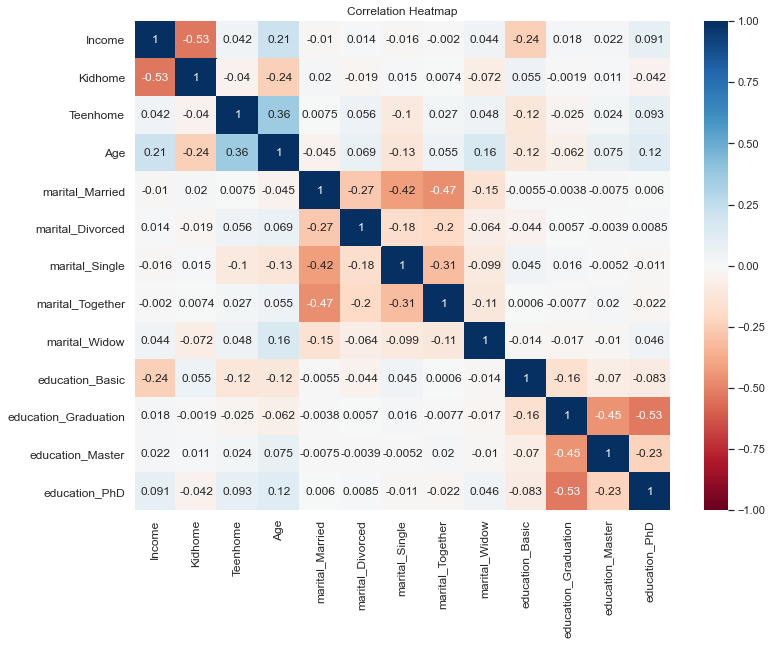

In [21]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(data_segmentation.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

## Visualize Raw Data

Text(0.5, 1.0, 'Visualization of raw data')

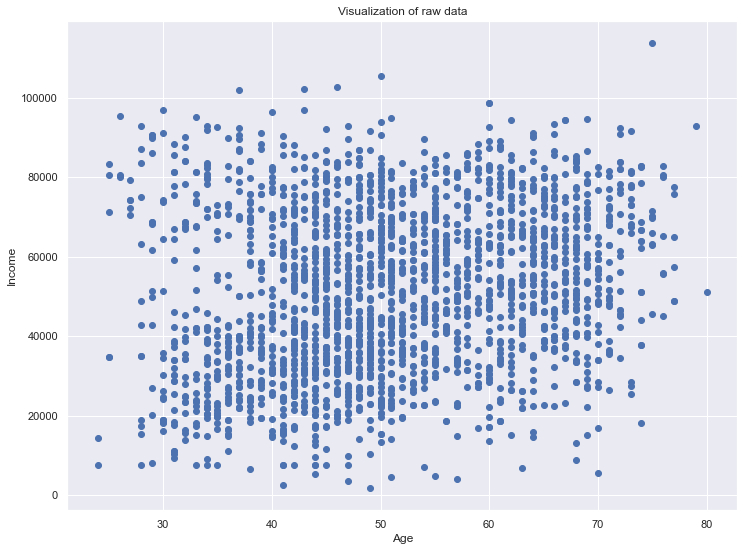

In [26]:
plt.figure(figsize = (12, 9))
plt.scatter(data_segmentation.iloc[:, 3], data_segmentation.iloc[:, 0])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

## Standardization 

In [27]:
# Standardizing data, so that all features have equal weight. 
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data_segmentation)

## Hierarchical Clustering 

In [30]:
# Perform Hierarchical Clustering.  
hier_clust = linkage(segmentation_std, method = 'ward')

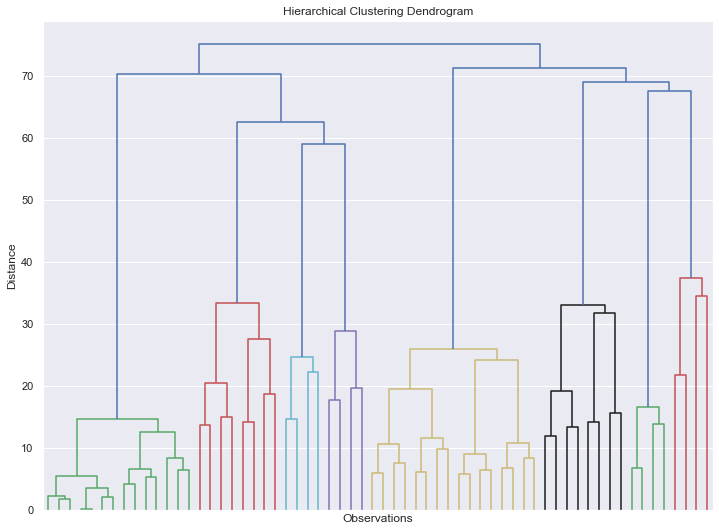

In [31]:
# We plot the results from the Hierarchical Clustering using a Dendrogram.
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 5, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

## K-means Clustering 

In [34]:
#In order to perform k-means clustering, i considered 1 to 10 clusters, 
#so the loop above runs 10 iterations.
#note that wcss = "sum of square distance between each point and the centroid in a cluster"
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)


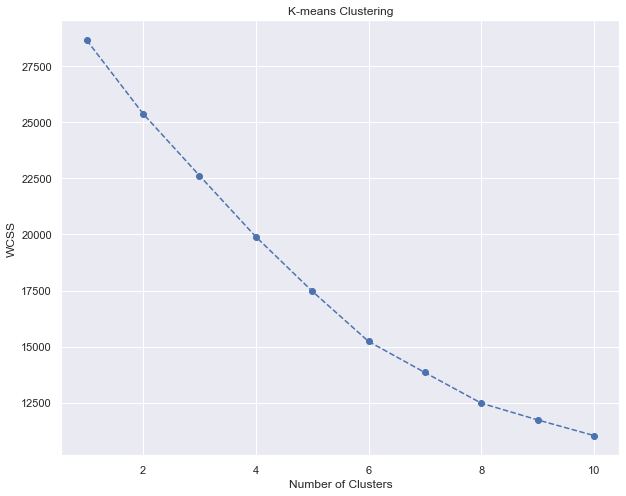

In [35]:
#plotting the within cluster sum of squares for the different number of clusters.
#From this plot we choose the number of clusters
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [36]:
#since we run k-means with a fixed number of clusters. In this case 6. 
#Recall the elbow method here 
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)

In [37]:
# We divide our data into the four clusters.
kmeans.fit(segmentation_std)

KMeans(n_clusters=6, random_state=42)

## Results  

In [51]:
#create a new data frame with the original features and add a new column with the assigned clusters for each point.
dataf_segm_kmeans = data_segmentation.copy()
dataf_segm_kmeans['Segment K-means'] = kmeans.labels_


In [40]:
# Calculate mean values for the clusters
dataf_segm_analysis = dataf_segm_kmeans.groupby(['Segment K-means']).mean()
dataf_segm_analysis

,Income,Kidhome,Teenhome,Age,marital_Married,marital_Divorced,marital_Single,marital_Together,marital_Widow,education_Basic,education_Graduation,education_Master,education_PhD
Segment K-means,,,,,,,,,,,,,
0,52652.528384,0.410480,0.598253,53.515284,0.00000,1.000000,0.000000,0.000000,0.000000,0.0,0.515284,0.161572,0.227074
1,52055.308153,0.454436,0.522782,50.634293,1.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.514388,0.165468,0.224221
2,52319.234657,0.445848,0.543321,52.258123,0.00000,0.000000,0.000000,1.000000,0.000000,0.0,0.510830,0.182310,0.205776
3,20306.259259,0.629630,0.092593,42.537037,0.37037,0.018519,0.333333,0.259259,0.018519,1.0,0.000000,0.000000,0.000000
4,52294.758170,0.442266,0.411765,48.671024,0.00000,0.000000,1.000000,0.000000,0.000000,0.0,0.540305,0.167756,0.215686
5,56939.666667,0.240000,0.653333,61.253333,0.00000,0.000000,0.000000,0.000000,1.000000,0.0,0.466667,0.146667,0.320000


In [45]:
#Now we compute the size and proportion of the six clusters
dataf_segm_analysis['N Obs'] = dataf_segm_kmeans[['Segment K-means', 'marital_Married']].groupby(['Segment K-means']).count()
dataf_segm_analysis['Prop Obs'] = dataf_segm_analysis['N Obs'] / dataf_segm_analysis['N Obs'].sum()

In [46]:
dataf_segm_analysis

,Income,Kidhome,Teenhome,Age,marital_Married,marital_Divorced,marital_Single,marital_Together,marital_Widow,education_Basic,education_Graduation,education_Master,education_PhD,N Obs,Prop Obs
Segment K-means,,,,,,,,,,,,,,,
0,52652.528384,0.410480,0.598253,53.515284,0.00000,1.000000,0.000000,0.000000,0.000000,0.0,0.515284,0.161572,0.227074,229,0.103855
1,52055.308153,0.454436,0.522782,50.634293,1.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.514388,0.165468,0.224221,834,0.378231
2,52319.234657,0.445848,0.543321,52.258123,0.00000,0.000000,0.000000,1.000000,0.000000,0.0,0.510830,0.182310,0.205776,554,0.251247
3,20306.259259,0.629630,0.092593,42.537037,0.37037,0.018519,0.333333,0.259259,0.018519,1.0,0.000000,0.000000,0.000000,54,0.024490
4,52294.758170,0.442266,0.411765,48.671024,0.00000,0.000000,1.000000,0.000000,0.000000,0.0,0.540305,0.167756,0.215686,459,0.208163
5,56939.666667,0.240000,0.653333,61.253333,0.00000,0.000000,0.000000,0.000000,1.000000,0.0,0.466667,0.146667,0.320000,75,0.034014


In [47]:
#Rename the indexes
dataf_segm_analysis.rename({0:"well-off/Rich",
                           5:"wealthy/Career focused",
                           2:"Standard/Doing-well",
                           4:"Average/Doing-good",
                           1:"Surving/Doing-ok",
                           3:"fewer-opportunities/Poor"})

,Income,Kidhome,Teenhome,Age,marital_Married,marital_Divorced,marital_Single,marital_Together,marital_Widow,education_Basic,education_Graduation,education_Master,education_PhD,N Obs,Prop Obs
Segment K-means,,,,,,,,,,,,,,,
well-off/Rich,52652.528384,0.410480,0.598253,53.515284,0.00000,1.000000,0.000000,0.000000,0.000000,0.0,0.515284,0.161572,0.227074,229,0.103855
Surving/Doing-ok,52055.308153,0.454436,0.522782,50.634293,1.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.514388,0.165468,0.224221,834,0.378231
Standard/Doing-well,52319.234657,0.445848,0.543321,52.258123,0.00000,0.000000,0.000000,1.000000,0.000000,0.0,0.510830,0.182310,0.205776,554,0.251247
fewer-opportunities/Poor,20306.259259,0.629630,0.092593,42.537037,0.37037,0.018519,0.333333,0.259259,0.018519,1.0,0.000000,0.000000,0.000000,54,0.024490
Average/Doing-good,52294.758170,0.442266,0.411765,48.671024,0.00000,0.000000,1.000000,0.000000,0.000000,0.0,0.540305,0.167756,0.215686,459,0.208163
wealthy/Career focused,56939.666667,0.240000,0.653333,61.253333,0.00000,0.000000,0.000000,0.000000,1.000000,0.0,0.466667,0.146667,0.320000,75,0.034014


In [53]:
#Add the segment labels to the table
dataf_segm_kmeans['Labels'] = dataf_segm_kmeans['Segment K-means'].map({
                           0:"well-off/Rich",
                           5:"wealthy/Career focused",
                           2:"Standard/Doing-well",
                           4:"Average/Doing-good",
                           1:"Surving/Doing-ok",
                           3:"fewer-opportunities/Poor"})
dataf_segm_kmeans

,Income,Kidhome,Teenhome,Age,marital_Married,marital_Divorced,marital_Single,marital_Together,marital_Widow,education_Basic,education_Graduation,education_Master,education_PhD,Segment K-means,Labels
0,58138.0,0,0,63,0,0,1,0,0,0,1,0,0,4,Average/Doing-good
1,46344.0,1,1,66,0,0,1,0,0,0,1,0,0,4,Average/Doing-good
2,71613.0,0,0,55,0,0,0,1,0,0,1,0,0,2,Standard/Doing-well
3,26646.0,1,0,36,0,0,0,1,0,0,1,0,0,2,Standard/Doing-well
4,58293.0,1,0,39,1,0,0,0,0,0,0,0,1,1,Surving/Doing-ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,53,1,0,0,0,0,0,1,0,0,1,Surving/Doing-ok
2201,64014.0,2,1,74,0,0,0,1,0,0,0,0,1,2,Standard/Doing-well
2202,56981.0,0,0,39,0,1,0,0,0,0,1,0,0,0,well-off/Rich
2203,69245.0,0,1,64,0,0,0,1,0,0,0,1,0,2,Standard/Doing-well


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


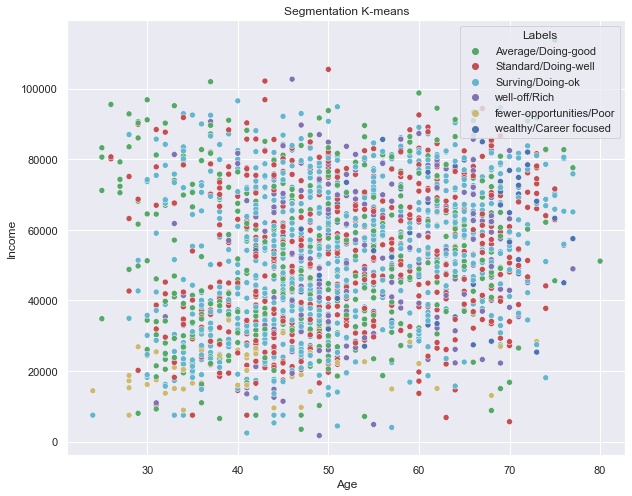

In [55]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = dataf_segm_kmeans['Age']
y_axis = dataf_segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = dataf_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm', 'y','b'])
plt.title('Segmentation K-means')
plt.show()

## PCA 

In [58]:
#Here i employed PCA in order to find subset of components, which explains the variance in the data.
pca = PCA()

In [59]:
# Fit PCA with the standardized data.
pca.fit(segmentation_std)

PCA()

In [67]:
pca.explained_variance_ratio_.round(4)

array([0.1506, 0.1221, 0.1157, 0.1046, 0.0948, 0.0915, 0.0831, 0.0786,
       0.0708, 0.0443, 0.0332, 0.0105, 0.    ])

Text(0, 0.5, 'Cumulative Explained Variance')

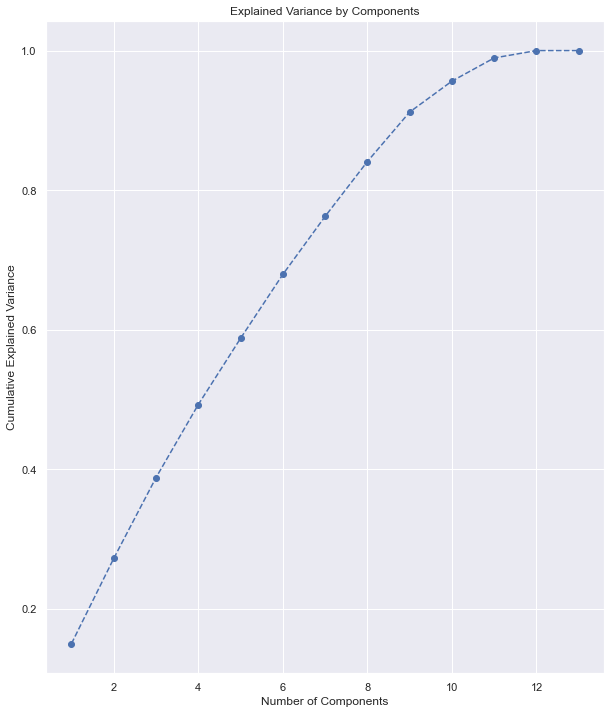

In [68]:
# Plotting the cumulative variance explained by total number of components.
# On this graph i choose the subset of components i want to keep. 
# Generally, i want to keep around 80 % of the explained variance
plt.figure(figsize = (10,12))
plt.plot(range(1,14), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [71]:
#i choose 9 components
pca = PCA(n_components = 9)

In [72]:
#fitting the model to the data with the selected number of components. In my case 9.
pca.fit(segmentation_std)

PCA(n_components=9)

## PCA Results 

In [73]:
# The loadings are the correlations between the components and the original features. 
pca.components_

array([[-0.46399914,  0.43504786, -0.32157913, -0.48427626,  0.04599072,
        -0.10061016,  0.16981987, -0.06470596, -0.18240874,  0.25436621,
         0.18428549, -0.0910008 , -0.26836715],
       [-0.2497242 ,  0.23447948,  0.02432501, -0.01419521,  0.08130538,
        -0.0522931 , -0.03268308, -0.01770233, -0.01328945,  0.21697506,
        -0.72088021,  0.34963541,  0.42657862],
       [-0.03950815,  0.02167784, -0.03505311,  0.02067436, -0.789307  ,
         0.09924021,  0.31016552,  0.49955943,  0.0438214 ,  0.06367472,
        -0.06054533,  0.08514905, -0.02838518],
       [ 0.27475492, -0.27558796, -0.28229201, -0.16699363, -0.08285085,
        -0.0346066 ,  0.64800311, -0.50403183,  0.02492669,  0.02870345,
        -0.12119883, -0.06386924,  0.19685959],
       [-0.23994698,  0.22083736,  0.22279371,  0.08629067, -0.12208745,
         0.27616524,  0.00636095, -0.13464464,  0.17170075,  0.04374954,
         0.100216  , -0.67216964,  0.48371533],
       [-0.17802504,  0.190175

In [74]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = data_segmentation.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8', 'Component 9'])
df_pca_comp

,Income,Kidhome,Teenhome,Age,marital_Married,marital_Divorced,marital_Single,marital_Together,marital_Widow,education_Basic,education_Graduation,education_Master,education_PhD
Component 1,-0.463999,0.435048,-0.321579,-0.484276,0.045991,-0.100610,0.169820,-0.064706,-0.182409,0.254366,0.184285,-0.091001,-0.268367
Component 2,-0.249724,0.234479,0.024325,-0.014195,0.081305,-0.052293,-0.032683,-0.017702,-0.013289,0.216975,-0.720880,0.349635,0.426579
Component 3,-0.039508,0.021678,-0.035053,0.020674,-0.789307,0.099240,0.310166,0.499559,0.043821,0.063675,-0.060545,0.085149,-0.028385
Component 4,0.274755,-0.275588,-0.282292,-0.166994,-0.082851,-0.034607,0.648003,-0.504032,0.024927,0.028703,-0.121199,-0.063869,0.196860
Component 5,-0.239947,0.220837,0.222794,0.086291,-0.122087,0.276165,0.006361,-0.134645,0.171701,0.043750,0.100216,-0.672170,0.483715
Component 6,-0.178025,0.190175,0.257640,0.161379,-0.107620,0.592537,0.124377,-0.444415,0.079193,-0.126412,0.035247,0.375633,-0.315386
Component 7,-0.179000,0.097168,0.257216,0.255166,0.015971,-0.570672,0.234570,-0.097152,0.616993,0.130616,0.089290,0.057483,-0.166874
Component 8,0.036278,-0.268755,-0.367342,-0.034209,-0.041065,0.305315,-0.340598,-0.047185,0.479939,0.568768,-0.057897,-0.035788,-0.136879
Component 9,-0.033181,-0.234256,0.380914,0.268058,0.060789,-0.015900,0.172374,-0.012753,-0.494164,0.647993,0.017892,-0.098676,-0.138196


([<matplotlib.axis.YTick at 0x1581119fdf0>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3'),
  Text(0, 3, 'Component 4'),
  Text(0, 4, 'Component 5'),
  Text(0, 5, 'Component 6'),
  Text(0, 6, 'Component 7'),
  Text(0, 7, 'Component 8'),
  Text(0, 8, 'Component 9')])

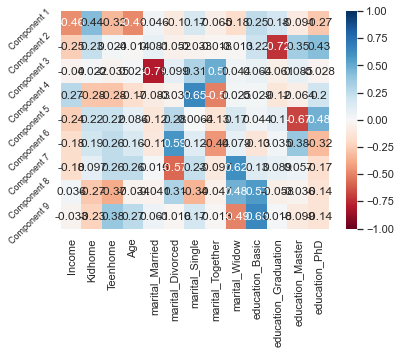

In [82]:
# Heat Map for Principal Components against original features. Again i used  the RdBu color scheme and set borders to -1 and 1.
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2, 3, 4, 5, 6 , 7, 8], 
           ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8', 'Component 9'],
           rotation = 45,
           fontsize = 9)

In [83]:
pca.transform(segmentation_std)

array([[ 0.01957613, -1.53250935,  0.81183032, ...,  0.58272187,
        -0.30260502,  0.51806794],
       [ 0.3789671 , -0.91259031,  0.81559321, ...,  1.40362045,
        -1.5074443 ,  0.86933538],
       [-0.51171794, -1.64640411,  1.16102927, ..., -0.50004202,
         0.46370416, -0.13457374],
       ...,
       [ 0.29701854, -1.58115082,  0.34300977, ..., -2.36727285,
         1.59160875, -0.50046124],
       [-2.0356454 ,  0.79952858,  1.46749315, ...,  0.16550285,
        -0.22229319,  0.47366455],
       [-1.10614055,  1.73366167, -1.51836604, ...,  0.22611401,
        -0.96999137,  0.19334057]])

In [84]:
scores_pca = pca.transform(segmentation_std)

## K-means Clustering with PCA 

In [85]:
#fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

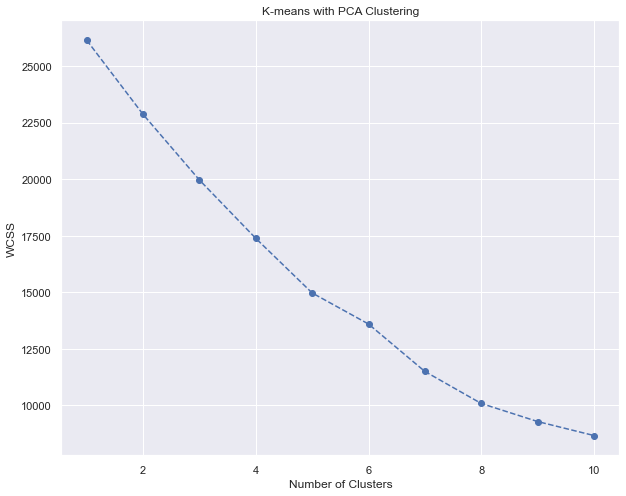

In [86]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
# Again it looks like four is the best option.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [100]:
kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

## K-means clustering with PCA Results 

In [101]:
#fitting the data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=5, random_state=42)

In [102]:
#create a new data frame with the original features and add the PCA scores and assigned clusters.
data_segm_pca_kmeans = pd.concat([data_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
data_segm_pca_kmeans.columns.values[-9: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8', 'Component 9']
# The last column we add ontains the pca k-means clustering labels.
data_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [103]:
data_segm_pca_kmeans

,Income,Kidhome,Teenhome,Age,marital_Married,marital_Divorced,marital_Single,marital_Together,marital_Widow,education_Basic,...,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Segment K-means PCA
0,58138.0,0,0,63,0,0,1,0,0,0,...,0.019576,-1.532509,0.811830,1.809997,-0.177715,0.132046,0.582722,-0.302605,0.518068,0
1,46344.0,1,1,66,0,0,1,0,0,0,...,0.378967,-0.912590,0.815593,0.578845,0.801650,1.102321,1.403620,-1.507444,0.869335,0
2,71613.0,0,0,55,0,0,0,1,0,0,...,-0.511718,-1.646404,1.161029,-0.623456,-0.716177,-1.412434,-0.500042,0.463704,-0.134574,3
3,26646.0,1,0,36,0,0,0,1,0,0,...,2.092179,-0.644458,1.253622,-1.462147,0.075996,-0.933723,-0.344672,-0.059998,-0.933937,3
4,58293.0,1,0,39,1,0,0,0,0,0,...,0.480447,1.656308,-1.512006,0.618315,0.763953,-1.206162,-0.882056,-0.206623,-1.133659,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,53,1,0,0,0,0,0,...,-0.544641,-1.266604,-1.649741,-0.268952,-0.143913,-0.081992,0.273705,-0.199995,0.690096,1
2201,64014.0,2,1,74,0,0,0,1,0,0,...,-1.119144,1.818813,1.277526,-1.819556,1.719050,-0.740520,0.230203,-1.497917,-0.231455,3
2202,56981.0,0,0,39,0,1,0,0,0,0,...,0.297019,-1.581151,0.343010,0.450068,0.546787,1.447519,-2.367273,1.591609,-0.500461,2
2203,69245.0,0,1,64,0,0,0,1,0,0,...,-2.035645,0.799529,1.467493,-1.231600,-2.224014,0.146710,0.165503,-0.222293,0.473665,3


In [118]:
#calculatimg the means by segments.
data_segm_pca_kmeans_freq = data_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
data_segm_pca_kmeans_freq

,Income,Kidhome,Teenhome,Age,marital_Married,marital_Divorced,marital_Single,marital_Together,marital_Widow,education_Basic,...,education_PhD,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9
Segment K-means PCA,,,,,,,,,,,,,,,,,,,,,
0,51009.622642,0.457023,0.402516,48.234801,0.0,0.0,1.0,0.0,0.0,0.037736,...,0.207547,0.632900,-0.098707,0.888258,1.677712,0.014926,0.281640,0.482300,-0.662489,0.302048
1,51350.511710,0.455504,0.511710,50.426230,1.0,0.0,0.0,0.0,0.0,0.023419,...,0.218970,0.113267,0.162267,-1.493749,-0.141750,-0.189313,-0.161040,0.021700,-0.052783,0.070390
2,52465.117391,0.413043,0.595652,53.473913,0.0,1.0,0.0,0.0,0.0,0.004348,...,0.226087,-0.577292,-0.243151,0.437563,-0.137945,0.997697,2.065742,-1.806501,0.914307,-0.042896
3,51553.198944,0.448944,0.531690,52.184859,0.0,0.0,0.0,1.0,0.0,0.024648,...,0.200704,-0.215094,-0.047686,1.276058,-1.163954,-0.281805,-0.897594,-0.178169,-0.081861,-0.019933
4,56481.552632,0.236842,0.644737,61.236842,0.0,0.0,0.0,0.0,1.0,0.013158,...,0.315789,-1.890429,-0.111609,0.348980,0.179462,1.120375,0.498663,3.527713,2.595921,-2.407926


In [119]:
#calculating the size of each cluster and its proportion
data_segm_pca_kmeans_freq['N Obs'] = data_segm_pca_kmeans[['Segment K-means PCA', 'marital_Married']].groupby(['Segment K-means PCA']).count()
data_segm_pca_kmeans_freq['Prop Obs'] = data_segm_pca_kmeans_freq['N Obs'] / data_segm_pca_kmeans_freq['N Obs'].sum()
data_segm_pca_kmeans_freq = data_segm_pca_kmeans_freq.rename({
                           0:"Alright/Not-so-bad",
                           4:"wealthy/Career focused",
                           2:"Standard/Doing-well",
                           3:"Average/Doing-good",
                           1:"Surving/Doing-ok"
                           })
data_segm_pca_kmeans_freq

,Income,Kidhome,Teenhome,Age,marital_Married,marital_Divorced,marital_Single,marital_Together,marital_Widow,education_Basic,...,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,,,,,,,,,,
Alright/Not-so-bad,51009.622642,0.457023,0.402516,48.234801,0.0,0.0,1.0,0.0,0.0,0.037736,...,-0.098707,0.888258,1.677712,0.014926,0.281640,0.482300,-0.662489,0.302048,477,0.216327
Surving/Doing-ok,51350.511710,0.455504,0.511710,50.426230,1.0,0.0,0.0,0.0,0.0,0.023419,...,0.162267,-1.493749,-0.141750,-0.189313,-0.161040,0.021700,-0.052783,0.070390,854,0.387302
Standard/Doing-well,52465.117391,0.413043,0.595652,53.473913,0.0,1.0,0.0,0.0,0.0,0.004348,...,-0.243151,0.437563,-0.137945,0.997697,2.065742,-1.806501,0.914307,-0.042896,230,0.104308
Average/Doing-good,51553.198944,0.448944,0.531690,52.184859,0.0,0.0,0.0,1.0,0.0,0.024648,...,-0.047686,1.276058,-1.163954,-0.281805,-0.897594,-0.178169,-0.081861,-0.019933,568,0.257596
wealthy/Career focused,56481.552632,0.236842,0.644737,61.236842,0.0,0.0,0.0,0.0,1.0,0.013158,...,-0.111609,0.348980,0.179462,1.120375,0.498663,3.527713,2.595921,-2.407926,76,0.034467


In [120]:
data_segm_pca_kmeans_freq.head()

,Income,Kidhome,Teenhome,Age,marital_Married,marital_Divorced,marital_Single,marital_Together,marital_Widow,education_Basic,...,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,,,,,,,,,,
Alright/Not-so-bad,51009.622642,0.457023,0.402516,48.234801,0.0,0.0,1.0,0.0,0.0,0.037736,...,-0.098707,0.888258,1.677712,0.014926,0.281640,0.482300,-0.662489,0.302048,477,0.216327
Surving/Doing-ok,51350.511710,0.455504,0.511710,50.426230,1.0,0.0,0.0,0.0,0.0,0.023419,...,0.162267,-1.493749,-0.141750,-0.189313,-0.161040,0.021700,-0.052783,0.070390,854,0.387302
Standard/Doing-well,52465.117391,0.413043,0.595652,53.473913,0.0,1.0,0.0,0.0,0.0,0.004348,...,-0.243151,0.437563,-0.137945,0.997697,2.065742,-1.806501,0.914307,-0.042896,230,0.104308
Average/Doing-good,51553.198944,0.448944,0.531690,52.184859,0.0,0.0,0.0,1.0,0.0,0.024648,...,-0.047686,1.276058,-1.163954,-0.281805,-0.897594,-0.178169,-0.081861,-0.019933,568,0.257596
wealthy/Career focused,56481.552632,0.236842,0.644737,61.236842,0.0,0.0,0.0,0.0,1.0,0.013158,...,-0.111609,0.348980,0.179462,1.120375,0.498663,3.527713,2.595921,-2.407926,76,0.034467


In [121]:
#Add the segment labels to the table
data_segm_pca_kmeans['Lagends'] = data_segm_pca_kmeans['Segment K-means PCA'].map({
                          0:"Alright/Not-so-bad",
                           4:"wealthy/Career focused",
                           2:"Standard/Doing-well",
                           3:"Average/Doing-good",
                           1:"Surving/Doing-ok"})
data_segm_pca_kmeans

,Income,Kidhome,Teenhome,Age,marital_Married,marital_Divorced,marital_Single,marital_Together,marital_Widow,education_Basic,...,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Segment K-means PCA,Lagends
0,58138.0,0,0,63,0,0,1,0,0,0,...,-1.532509,0.811830,1.809997,-0.177715,0.132046,0.582722,-0.302605,0.518068,0,Alright/Not-so-bad
1,46344.0,1,1,66,0,0,1,0,0,0,...,-0.912590,0.815593,0.578845,0.801650,1.102321,1.403620,-1.507444,0.869335,0,Alright/Not-so-bad
2,71613.0,0,0,55,0,0,0,1,0,0,...,-1.646404,1.161029,-0.623456,-0.716177,-1.412434,-0.500042,0.463704,-0.134574,3,Average/Doing-good
3,26646.0,1,0,36,0,0,0,1,0,0,...,-0.644458,1.253622,-1.462147,0.075996,-0.933723,-0.344672,-0.059998,-0.933937,3,Average/Doing-good
4,58293.0,1,0,39,1,0,0,0,0,0,...,1.656308,-1.512006,0.618315,0.763953,-1.206162,-0.882056,-0.206623,-1.133659,1,Surving/Doing-ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,53,1,0,0,0,0,0,...,-1.266604,-1.649741,-0.268952,-0.143913,-0.081992,0.273705,-0.199995,0.690096,1,Surving/Doing-ok
2201,64014.0,2,1,74,0,0,0,1,0,0,...,1.818813,1.277526,-1.819556,1.719050,-0.740520,0.230203,-1.497917,-0.231455,3,Average/Doing-good
2202,56981.0,0,0,39,0,1,0,0,0,0,...,-1.581151,0.343010,0.450068,0.546787,1.447519,-2.367273,1.591609,-0.500461,2,Standard/Doing-well
2203,69245.0,0,1,64,0,0,0,1,0,0,...,0.799529,1.467493,-1.231600,-2.224014,0.146710,0.165503,-0.222293,0.473665,3,Average/Doing-good


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


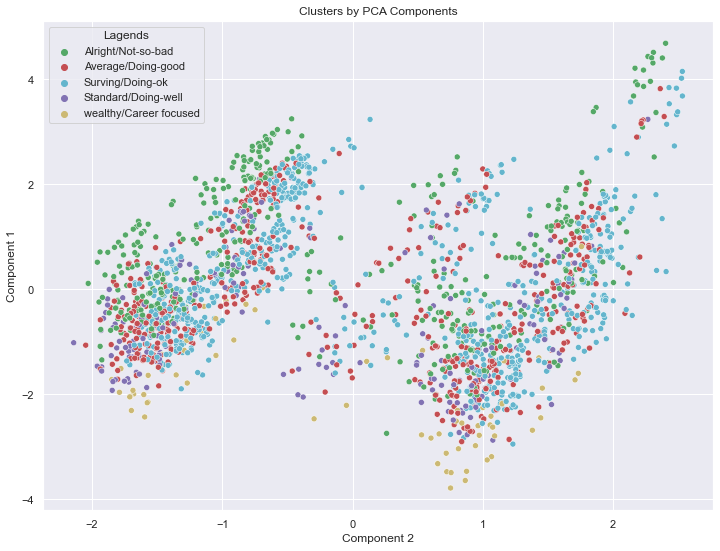

In [129]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = data_segm_pca_kmeans['Component 2']
y_axis = data_segm_pca_kmeans['Component 1']
plt.figure(figsize = (12, 9))
sns.scatterplot(x_axis, y_axis, hue = data_segm_pca_kmeans['Lagends'], palette = ['g', 'r', 'c', 'm', 'y'])
plt.title('Clusters by PCA Components')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


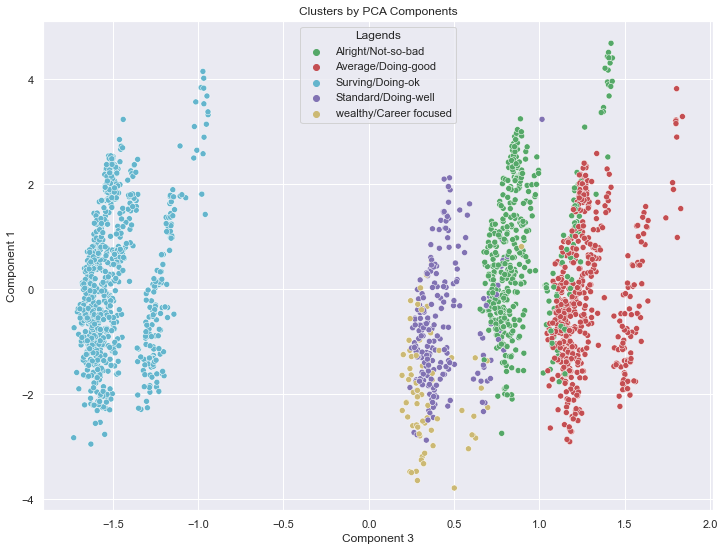

In [128]:
x_axis = data_segm_pca_kmeans['Component 3']
y_axis = data_segm_pca_kmeans['Component 1']
plt.figure(figsize = (12, 9))
sns.scatterplot(x_axis, y_axis, hue = data_segm_pca_kmeans['Lagends'], palette = ['g', 'r', 'c', 'm', 'y'])
plt.title('Clusters by PCA Components')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


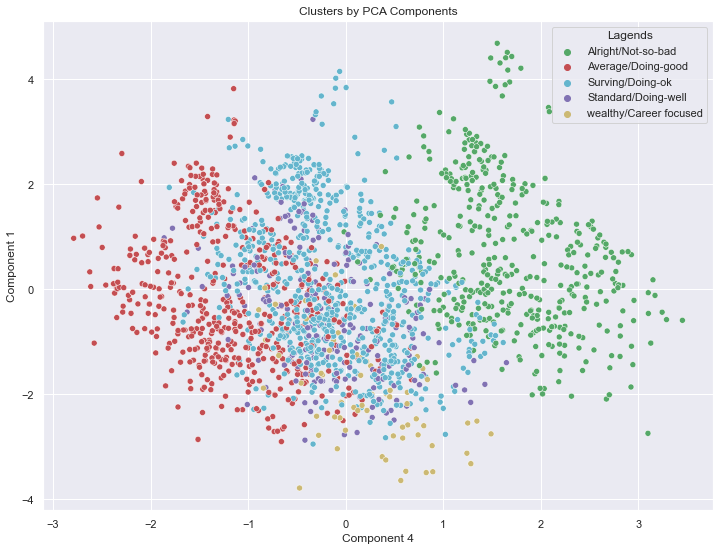

In [130]:
x_axis = data_segm_pca_kmeans['Component 4']
y_axis = data_segm_pca_kmeans['Component 1']
plt.figure(figsize = (12, 9))
sns.scatterplot(x_axis, y_axis, hue = data_segm_pca_kmeans['Lagends'], palette = ['g', 'r', 'c', 'm', 'y'])
plt.title('Clusters by PCA Components')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


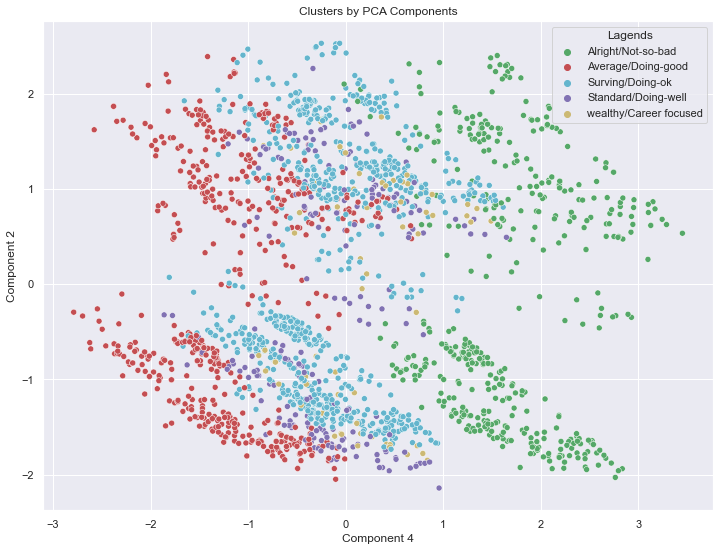

In [131]:
x_axis = data_segm_pca_kmeans['Component 4']
y_axis = data_segm_pca_kmeans['Component 2']
plt.figure(figsize = (12, 9))
sns.scatterplot(x_axis, y_axis, hue = data_segm_pca_kmeans['Lagends'], palette = ['g', 'r', 'c', 'm', 'y'])
plt.title('Clusters by PCA Components')
plt.show()

## Data Export 

In [134]:
#saving the objects we'll need in the Purchase Analytics part of the course. We export them as pickle objects.
#i  need the scaler, pca and kmeans_pca objects to preprocess and segment the purchase data set.
pickle.dump(scaler, open("C:/IFOOD/scaler.pickle", 'wb'))

In [135]:
pickle.dump(pca, open("C:/IFOOD/pca.pickle", 'wb'))

In [136]:
pickle.dump(kmeans_pca, open("C:/IFOOD/kmeans_pca.pickle", 'wb'))

In [137]:
kmeans_pca.labels_

array([0, 0, 3, ..., 2, 3, 1])